# Домашнее задание №3

In [27]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

Таблица Indian liver pations records.

In [62]:
url="http://yustiks.ru/dataset/indian_liver_patient.csv"
data=pd.read_csv(url)
data.drop(data[data.Total_Bilirubin > 70].index, inplace = True) # почистили данные, убрали выброс

data1 = data[data.isna().any(axis=1)]
data.drop(data1.index, inplace = True) # убрали NaN значения

data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Columns:

*  Age of the patient
*  Gender of the patient
*  Total Bilirubin
*  Direct Bilirubin
*  Alkaline Phosphotase
*  Alamine Aminotransferase
*  Aspartate Aminotransferase
*  Total Protiens
*  Albumin
*  Albumin and Globulin Ratio
*  Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Построить одномерную линейную регрессию Direct_Bilirubin и Total_Bilirubin. Построить график. Строим прямую с помощью уравнения которое мы посчитали. Предсказать несколько элементов из таблицы с помощью метода predict() и сравнить с результатом табличным.

In [63]:
from sklearn.linear_model import LinearRegression
direct = data['Direct_Bilirubin']
total = data['Total_Bilirubin']
model = LinearRegression()
result = model.fit(np.array(total).reshape(-1,1), direct)

print('intercept:', model.intercept_)

print('slope:', model.coef_)

intercept: -0.11990614706223357
slope: [0.50461116]


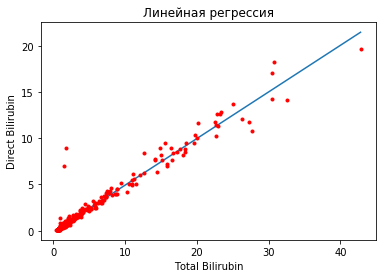

In [64]:
plt.xlabel('Total Bilirubin')
plt.ylabel('Direct Bilirubin')
plt.title('Линейная регрессия')
x = np.linspace(min(total), max(total), 100)
y = model.coef_*x + model.intercept_
plt.plot(x,y)
plt.plot(total, direct, 'r.')
plt.show()

In [65]:
print(model.predict(np.array([30.5]).reshape(-1, 1)))
data[(data.Total_Bilirubin > 30) & (data.Total_Bilirubin < 31)]

[15.27073435]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
259,42,Male,30.5,14.2,285,65,130,5.2,2.1,0.6,1
504,32,Male,30.5,17.1,218,39,79,5.5,2.7,0.9,1
531,40,Male,30.8,18.3,285,110,186,7.9,2.7,0.5,1


In [66]:
print(model.predict(np.array([20]).reshape(-1, 1)))
data[(data.Total_Bilirubin > 19.5) & (data.Total_Bilirubin < 20.5)]

[9.97231713]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
503,53,Male,19.8,10.4,238,39,221,8.1,2.5,0.4,1
509,46,Male,20.0,10.0,254,140,540,5.4,3.0,1.2,1
535,60,Male,19.6,9.5,466,46,52,6.1,2.0,0.4,1
546,45,Male,20.2,11.7,188,47,32,5.4,2.3,0.7,1


Построить многомерную линейную регрессию для предсказания болезни (Dataset) от двух параметров. Параметры подобрать с помощью матрицы корреляций. Предсказать несколько значений из таблицы и сравнить результат модели от табличного значения.

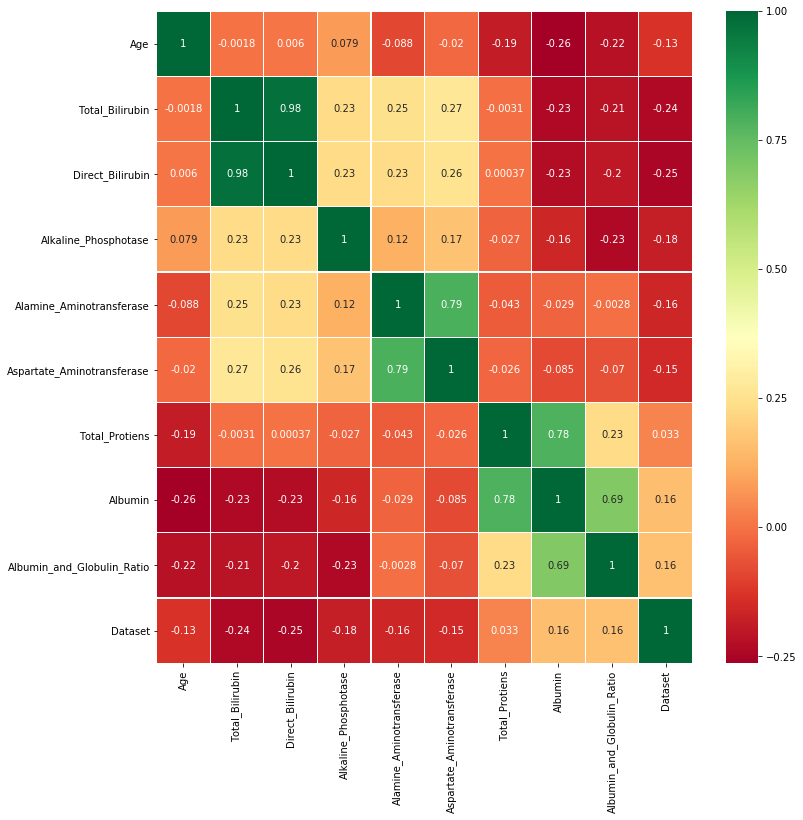

In [67]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

In [75]:
# возьмем параметры Aspartate Aminotransferase и Alamine Aminotransferase с корреляцией 0.79
albumin = data['Albumin']
ag_ratio = data['Albumin_and_Globulin_Ratio']
dataset = data['Dataset']
x = np.vstack([np.array(albumin), np.array(ag_ratio)]).T
y = np.array(dataset)
model_1 = LinearRegression().fit(x, y)

print('intercept:', model_1.intercept_)
print('slope:', model_1.coef_)

intercept: 0.9904650756683181
slope: [0.05121473 0.14161901]


In [76]:
print(x)

[[3.3  0.9 ]
 [3.2  0.74]
 [3.3  0.89]
 ...
 [3.2  1.  ]
 [3.4  1.  ]
 [4.4  1.5 ]]


In [80]:
print(model_1.predict(np.array([3.3, 0.8]).reshape(-1, 2)))
data[(data.Albumin == 3.3) & (data.Albumin_and_Globulin_Ratio < 1)]

[1.2727689]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
35,30,Male,1.3,0.4,482,102,80,6.9,3.3,0.90,1
89,60,Male,4.0,1.9,238,119,350,7.1,3.3,0.80,1
96,39,Male,3.8,1.5,298,102,630,7.1,3.3,0.80,1
168,60,Male,22.8,12.6,962,53,41,6.9,3.3,0.90,1
378,50,Female,0.7,0.1,192,20,41,7.3,3.3,0.80,1
381,39,Male,0.6,0.2,188,28,43,8.1,3.3,0.60,1
428,52,Female,0.6,0.1,194,10,12,6.9,3.3,0.90,2
492,35,Female,1.0,0.3,805,133,103,7.9,3.3,0.70,1


In [85]:
print(model_1.predict(np.array([3.2, 1.]).reshape(-1, 2)))
data[(data.Albumin > 3) & (data.Albumin < 3.4) & (data.Albumin_and_Globulin_Ratio == 1.)]

[1.29597123]


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
43,50,Male,2.6,1.2,415,407,576,6.4,3.2,1.0,1
87,58,Male,0.8,0.2,298,33,59,6.2,3.1,1.0,1
156,32,Male,0.9,0.3,462,70,82,6.2,3.1,1.0,1
171,44,Female,1.9,0.6,298,378,602,6.6,3.3,1.0,1
204,21,Male,0.7,0.2,135,27,26,6.4,3.3,1.0,2
216,55,Male,0.9,0.2,116,36,16,6.2,3.2,1.0,2
336,75,Male,6.7,3.6,458,198,143,6.2,3.2,1.0,1
360,24,Male,0.7,0.2,218,47,26,6.6,3.3,1.0,1
389,72,Male,0.6,0.1,102,31,35,6.3,3.2,1.0,1
395,45,Male,0.8,0.2,140,24,20,6.3,3.2,1.0,2


Посчитать квартили для всех колонок. 

In [86]:
data.quantile([.25, .50, .75], axis = 0) 

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0.25,33.0,0.8,0.2,175.25,23.0,25.0,5.8,2.6,0.70,1.0
0.50,45.0,1.0,0.3,208.00,35.0,42.0,6.6,3.1,0.94,1.0
0.75,58.0,2.6,1.3,298.00,61.0,87.0,7.2,3.8,1.10,2.0


Построить график histogram двух выборок по наличию или отсутствию болезни: люди, возрастом до 50 лет, и люди после 50 лет. Посчитать среднее значение и квартиль 0.5 в данных выборках. Чем они отличаются?

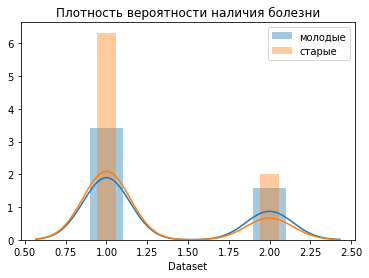

In [92]:
young = data[data.Age < 50]['Dataset']
old = data[data.Age >= 50]['Dataset']
sns.distplot(young, bins=[0.9,1.1,1.9,2.1])
sns.distplot(old, bins=[0.94,1.06,1.94,2.06])
plt.title('Плотность вероятности наличия болезни')
plt.legend(['молодые', 'старые'])
plt.show()

In [93]:
young.mean()

1.3142857142857143

In [94]:
old.mean()

1.2412280701754386

In [95]:
print('Квантили по молодым')
young.quantile([.25, .50, .75])

Квантили по молодым


0.25    1.0
0.50    1.0
0.75    2.0
Name: Dataset, dtype: float64

In [96]:
print('Квантили по старым')
old.quantile([.25, .50, .75]) 

Квантили по старым


0.25    1.0
0.50    1.0
0.75    1.0
Name: Dataset, dtype: float64

**Средние значения не отличаются, а вот по квартилям видно, что у молодых разброс больше.**


Посчитать критерий одновыборочный t-критерий для выборки по критерию Total_Bilirubin у больных людей. Как показатель помогает понять, что выборки не похожа на генеральную совокупность?

In [97]:
ill_TB = data[data.Dataset == 2]['Total_Bilirubin']
stats.ttest_1samp(ill_TB, data['Total_Bilirubin'].mean())

Ttest_1sampResult(statistic=-26.037490575371375, pvalue=3.836629470504855e-60)

**Чем выше t, тем более различны группы между собой. Чем меньше t, тем более похожи группы и результаты повторятся.**

**В данном случае t = -26, значит, группы различны.**

Посчитать критерий t для двух выборок: больные и здоровые (по критерию Total_Bilirubin). Имеют ли данные группы схожесть?

In [98]:
ill_TB = data[data.Dataset == 2]['Total_Bilirubin']
healthy_TB = data[data.Dataset == 1]['Total_Bilirubin']

stats.ttest_ind(ill_TB, healthy_TB)

Ttest_indResult(statistic=-5.845534565840006, pvalue=8.459792145983823e-09)

**Группы различны, так как t >> 1**

Посчитать статистическую значимость для трех выборок (по возрасту) - 1ая группа от 1 до 30 лет, 2ая группа от 30 лет до 55, 3я группа более 55 по выборке Dataset. Сравнить с реальностью (они логично что будут отличаться).

In [103]:
kids = data[data.Age < 30]['Dataset']
young = data[(data.Age >= 30) & (data.Age < 55)]['Dataset']
old = data[data.Age >= 55]['Dataset']

print(stats.f_oneway(kids, young, old))
np.vstack([kids[:20], young[:20], old[:20]]).T

F_onewayResult(statistic=8.836323932344097, pvalue=0.00016604506373050896)


array([[1, 1, 1],
       [1, 1, 1],
       [2, 2, 1],
       [2, 1, 1],
       [2, 1, 1],
       [2, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [2, 1, 2],
       [1, 1, 1],
       [1, 1, 1],
       [2, 1, 1],
       [1, 2, 2],
       [1, 2, 2],
       [1, 1, 1],
       [2, 1, 2],
       [2, 1, 2],
       [1, 1, 2],
       [2, 1, 1],
       [2, 2, 2]], dtype=int64)

**Из примера видно, что больше всех болеет 1ая группа от 1 до 30 лет, в то время как представители второй и третей групп болеют гораздо реже.**

Вопросы задавать на почту yustiks@gmail.com